## Connecting to webcam using pygame module

**NOTE**: If you want to remove pygame dependency, you can go much lower level and access the **Video 4 Linux 2 API** directly using **ioctl** calls using Python's **fcntl library**.

In [1]:
import pygame
import pygame.camera as cm

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


**1) Initialize pygame camera**

In [2]:
cm.init()

**2) Check if your device is listed**

> The device should have been listed before running the docker 
```bash
docker run -it --device /dev/video0 ...
```
>> In case it gets complicated to find devices, use **--privileged** and map all devices 
```bash
docker run -it --privileged -v /dev:/dev ...
```

> **To find the device folder in your machine (command line)**
```bash
sudo apt-get install v4l-utils
v4l2-ctl --list-devices
```
>> **OUTPUT** : 
Webcam C170 (usb-0000:00:14.0-4):
	/dev/video0



You can also list devices from pygame module

In [3]:
cm.list_cameras()

['/dev/video0']

**3) Set up the device**

In [4]:
cam = cm.Camera(cm.list_cameras()[0])

**4) Start camera and capture pictures**

In [5]:
cam.start()

In [6]:
img = cam.get_image()

In [7]:
img

<Surface(640x480x24 SW)>

In [8]:
cam.stop()

**5) Change the image to numpy array**

> Numpy should be installed separately

In [9]:
#Convert to numpy array
#The height and width are swapped
imgdata = pygame.surfarray.array3d(img)

In [10]:
imgdata

array([[[155, 175, 175],
        [156, 173, 176],
        [161, 176, 180],
        ...,
        [ 56,  55,  34],
        [ 58,  53,  33],
        [ 58,  52,  37]],

       [[157, 177, 177],
        [159, 176, 179],
        [160, 175, 179],
        ...,
        [ 56,  55,  34],
        [ 59,  54,  34],
        [ 58,  52,  37]],

       [[160, 178, 176],
        [160, 176, 177],
        [162, 174, 181],
        ...,
        [ 55,  57,  35],
        [ 57,  56,  35],
        [ 55,  56,  39]],

       ...,

       [[ 27,  27,  27],
        [ 28,  27,  27],
        [ 29,  25,  26],
        ...,
        [ 21,  20,  17],
        [ 21,  20,  17],
        [ 21,  20,  17]],

       [[ 30,  26,  27],
        [ 30,  26,  24],
        [ 29,  25,  26],
        ...,
        [ 19,  19,  19],
        [ 20,  19,  19],
        [ 20,  19,  19]],

       [[ 29,  25,  26],
        [ 29,  25,  23],
        [ 29,  25,  26],
        ...,
        [ 19,  19,  19],
        [ 20,  19,  19],
        [ 20,  19,  19]]

In [11]:
imgdata.shape

(640, 480, 3)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

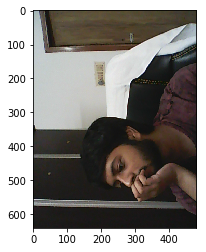

In [13]:
#image dimensions are swapped
plt.imshow(imgdata)

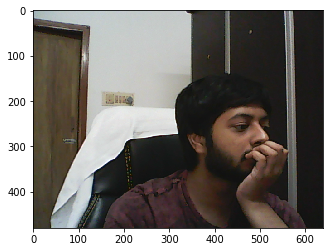

In [14]:
plt.imshow(imgdata.swapaxes(0,1)) #Can also use transpose (1,0,2)